## Importing csv file for pre-processing values includes 5 stocks and 5 ETFs

In [22]:
import pandas as pd
# Loading the CSV file with multiple asset data
df = pd.read_csv('Portfolio_Stocks_ETFs.csv')

#Display the first 5 rows
print(df.head(5))

         Date                       Name  Asset Type       Open       High  \
0  12/06/2014  SPDR Solactive Germany ETF       ETFs  60.189999  60.189999   
1  13/06/2014  SPDR Solactive Germany ETF       ETFs  60.189999  60.189999   
2  16/06/2014  SPDR Solactive Germany ETF       ETFs  60.189999  60.189999   
3  17/06/2014  SPDR Solactive Germany ETF       ETFs  60.189999  60.189999   
4  18/06/2014  SPDR Solactive Germany ETF       ETFs  60.189999  60.189999   

         Low      Close  Adj Close  Volume  
0  60.189999  60.189999  53.323559     100  
1  60.189999  60.189999  53.323559       0  
2  60.189999  60.189999  53.323559       0  
3  60.189999  60.189999  53.323559       0  
4  60.189999  60.189999  53.323559       0  


In [23]:
#printing information of the csv file
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1992 non-null   object 
 1   Name        1992 non-null   object 
 2   Asset Type  1992 non-null   object 
 3   Open        1992 non-null   float64
 4   High        1992 non-null   float64
 5   Low         1992 non-null   float64
 6   Close       1992 non-null   float64
 7   Adj Close   1992 non-null   float64
 8   Volume      1992 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 140.2+ KB
None


## Changing the date format to compatible version

In [24]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [25]:
# Printing the new format date
print(df['Date'].head(5))

0   2014-06-12
1   2014-06-13
2   2014-06-16
3   2014-06-17
4   2014-06-18
Name: Date, dtype: datetime64[ns]


## Changing format of Asset type to category

In [26]:
df['Asset Type'] = df['Asset Type'].astype('category') 

In [27]:
print(df.head(5))

        Date                       Name  Asset Type       Open       High  \
0 2014-06-12  SPDR Solactive Germany ETF       ETFs  60.189999  60.189999   
1 2014-06-13  SPDR Solactive Germany ETF       ETFs  60.189999  60.189999   
2 2014-06-16  SPDR Solactive Germany ETF       ETFs  60.189999  60.189999   
3 2014-06-17  SPDR Solactive Germany ETF       ETFs  60.189999  60.189999   
4 2014-06-18  SPDR Solactive Germany ETF       ETFs  60.189999  60.189999   

         Low      Close  Adj Close  Volume  
0  60.189999  60.189999  53.323559     100  
1  60.189999  60.189999  53.323559       0  
2  60.189999  60.189999  53.323559       0  
3  60.189999  60.189999  53.323559       0  
4  60.189999  60.189999  53.323559       0  


## Calculation of QUBO Matrix for QAOA IMPLEMENTATION

In [28]:
import numpy as np
import pandas as pd

# Covariance matrix
covariance_matrix = np.array([[0.001, 0.0005],
                               [0.0005, 0.002]])

# Expected returns from assets and total number of assets
expected_returns = np.array([0.05, 0.07])  

n_assets = covariance_matrix.shape[0]

# Construct QUBO matrix
Q = np.zeros((n_assets, n_assets))

# Putting values in QUBO matrix
for i in range(n_assets):
    for j in range(n_assets):
        if i == j:
            Q[i, j] = -expected_returns[i] + 2 * covariance_matrix[i, j]
        else:
            Q[i, j] = 2 * covariance_matrix[i, j]

print("QUBO Matrix:")
print(Q)


QUBO Matrix:
[[-0.048  0.001]
 [ 0.001 -0.066]]


## Creating the Pauli Operators for Implementation of portfolio

## For 2 Assets

In [29]:
from qiskit import QuantumCircuit

# Number of assets 
n_assets = 2  

# Using the above QUBO matrix 
Q = np.array([[0.001, 0.0005],
              [0.0005, 0.002]])

# Creating a Quantum Circuit
qc = QuantumCircuit(n_assets)

# Add Pauli-X gates based on the QUBO matrix
for i in range(n_assets):
    for j in range(i + 1, n_assets):  
        if Q[i, j] != 0:
            qc.rzz(Q[i, j], i, j) 

# Draw the quantum circuit
print(qc.draw())



                  
q_0: ─■───────────
      │ZZ(0.0005) 
q_1: ─■───────────
                  


## Importing required libraries for creating graphs

In [30]:
import matplotlib.pyplot as plt

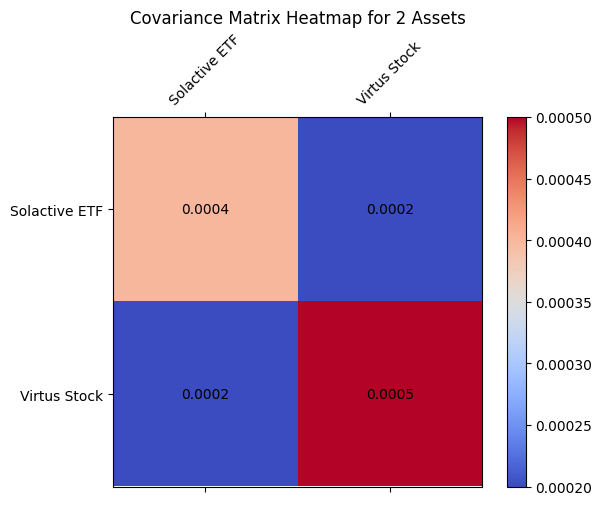

In [31]:
covariance_matrix = np.array([[0.0004, 0.0002],
                              [0.0002, 0.0005]])

# Asset names for labeling 
assets = ['Solactive ETF', 'Virtus Stock']

# Creating a heatmap using matplotlib
fig, ax = plt.subplots()

# Plotting the heatmap
cax = ax.matshow(covariance_matrix, cmap='coolwarm')

# Adding color bar
fig.colorbar(cax)

# Setting axis labels
ax.set_xticks(np.arange(len(assets)))
ax.set_yticks(np.arange(len(assets)))

# Labeling them as per name of stocks and ETFs
ax.set_xticklabels(assets)
ax.set_yticklabels(assets)

# Rotating the x-axis labels 
plt.xticks(rotation=45)

# Adding values on the heatmap
for (i, j), val in np.ndenumerate(covariance_matrix):
    ax.text(j, i, f'{val:.4f}', ha='center', va='center', color='black')

plt.title('Covariance Matrix Heatmap for 2 Assets')
plt.show()

## For 5 Assets

In [34]:
n_assets = 5

# QUBO matrix for 5 assets
Q = np.array([[0.001, 0.0005, 0.0004, 0.0003, 0.0002],
              [0.0005, 0.002, 0.0006, 0.0004, 0.0003],
              [0.0004, 0.0006, 0.003, 0.0007, 0.0004],
              [0.0003, 0.0004, 0.0007, 0.004, 0.0005],
              [0.0002, 0.0003, 0.0004, 0.0005, 0.005]])

# Create a Quantum Circuit with 5 qubits for 5 different assets
qc = QuantumCircuit(n_assets)

# Add Pauli-X gates 
for i in range(n_assets):
    for j in range(i + 1, n_assets):  
        if Q[i, j] != 0:
            qc.rzz(Q[i, j], i, j)  

# Draw the quantum circuit
print(qc.draw())



                                                                      »
q_0: ─■────────────■────────────■─────────────────────────■───────────»
      │ZZ(0.0005)  │            │                         │           »
q_1: ─■────────────┼────────────┼────────────■────────────┼───────────»
                   │ZZ(0.0004)  │            │ZZ(0.0006)  │           »
q_2: ──────────────■────────────┼────────────■────────────┼───────────»
                                │ZZ(0.0003)               │           »
q_3: ───────────────────────────■─────────────────────────┼───────────»
                                                          │ZZ(0.0002) »
q_4: ─────────────────────────────────────────────────────■───────────»
                                                                      »
«                                                                      
«q_0: ─────────────────────────────────────────────────────────────────
«                                                               

## HeatMap for 5 assets

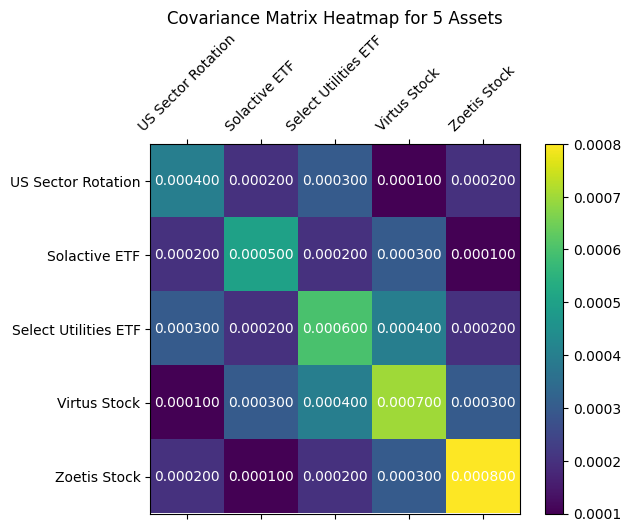

In [35]:
covariance_matrix = np.array([[0.0004, 0.0002, 0.0003, 0.0001, 0.0002],
                              [0.0002, 0.0005, 0.0002, 0.0003, 0.0001],
                              [0.0003, 0.0002, 0.0006, 0.0004, 0.0002],
                              [0.0001, 0.0003, 0.0004, 0.0007, 0.0003],
                              [0.0002, 0.0001, 0.0002, 0.0003, 0.0008]])

assets = ['US Sector Rotation', 'Solactive ETF', 'Select Utilities ETF', 'Virtus Stock', 'Zoetis Stock']

# Creating a heatmap 
fig, ax = plt.subplots()

# Plotting the heatmap
cax = ax.matshow(covariance_matrix, cmap='viridis') 

# Adding color bar
fig.colorbar(cax)

# Setting axis labels
ax.set_xticks(np.arange(len(assets)))
ax.set_yticks(np.arange(len(assets)))

# Labeling them with the respective asset names
ax.set_xticklabels(assets)
ax.set_yticklabels(assets)

# Rotateting the x-axis labels 
plt.xticks(rotation=45)

# Adding values on the heatmap with a different formatting
for (i, j), val in np.ndenumerate(covariance_matrix):
    ax.text(j, i, f'{val:.6f}', ha='center', va='center', color='white')

plt.title('Covariance Matrix Heatmap for 5 Assets')
plt.show()

## For 10 Assets

In [36]:
n_assets = 10

# QUBO matrix 
Q = np.array([[0.001, 0.0005, 0.0004, 0.0003, 0.0002, 0.0001, 0.0006, 0.0007, 0.0008, 0.0009],
              [0.0005, 0.002, 0.0006, 0.0004, 0.0003, 0.0002, 0.0007, 0.0008, 0.0009, 0.0010],
              [0.0004, 0.0006, 0.003, 0.0007, 0.0004, 0.0003, 0.0008, 0.0009, 0.0010, 0.0011],
              [0.0003, 0.0004, 0.0007, 0.004, 0.0005, 0.0004, 0.0009, 0.0010, 0.0011, 0.0012],
              [0.0002, 0.0003, 0.0004, 0.0005, 0.005, 0.0005, 0.0010, 0.0011, 0.0012, 0.0013],
              [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.006, 0.0011, 0.0012, 0.0013, 0.0014],
              [0.0006, 0.0007, 0.0008, 0.0009, 0.0010, 0.0011, 0.007, 0.0013, 0.0014, 0.0015],
              [0.0007, 0.0008, 0.0009, 0.0010, 0.0011, 0.0012, 0.0013, 0.008, 0.0015, 0.0016],
              [0.0008, 0.0009, 0.0010, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.009, 0.0017],
              [0.0009, 0.0010, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.010]])

# Create a Quantum Circuit with 10 qubits for 10 different assets
qc = QuantumCircuit(n_assets)

# Adding Pauli-X gates based on the QUBO matrix 
for i in range(n_assets):
    for j in range(i + 1, n_assets):  
        if Q[i, j] != 0:
            qc.rzz(Q[i, j], i, j)  

# Draw the quantum circuit
print(qc.draw())

                                                                      »
q_0: ─■────────────■────────────■─────────────────────────■───────────»
      │ZZ(0.0005)  │            │                         │           »
q_1: ─■────────────┼────────────┼────────────■────────────┼───────────»
                   │ZZ(0.0004)  │            │ZZ(0.0006)  │           »
q_2: ──────────────■────────────┼────────────■────────────┼───────────»
                                │ZZ(0.0003)               │           »
q_3: ───────────────────────────■─────────────────────────┼───────────»
                                                          │ZZ(0.0002) »
q_4: ─────────────────────────────────────────────────────■───────────»
                                                                      »
q_5: ─────────────────────────────────────────────────────────────────»
                                                                      »
q_6: ───────────────────────────────────────────────────────────